<a href="https://colab.research.google.com/github/Haque14/MSE504/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 6 for the Fall 2024 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin
- EELS data by Kevin Roccapriore, Oak Ridge National Laboratory

Special point:
- ChatGPT will augment your power as a coder
- If and only if you know what you want to accomplish!

# Imports

0. Add imports as necessary

In [1]:
from copy import deepcopy as dc

import numpy as np
from sklearn import decomposition

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Problem 1 - PCA

1. Create the data set:
- Import the MNIST data set (from Keras)
- Select the images corresponding to single digit (e.g. 7)
- Run the PCA analysis on images

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Explained variance by each component: [0.16053076 0.10935411]


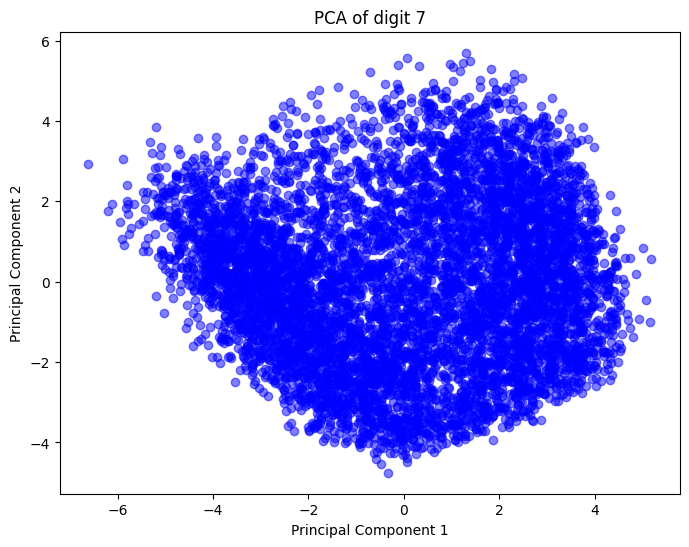

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.decomposition import PCA

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Select the images corresponding to the digit '7'
digit = 7
selected_images = images[labels == digit]

# Flatten the images and normalize
n_samples = selected_images.shape[0]
flattened_images = selected_images.reshape(n_samples, -1) / 255.0

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, color='blue')
plt.title(f'PCA of digit {digit}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

2. Visualize the scree plot

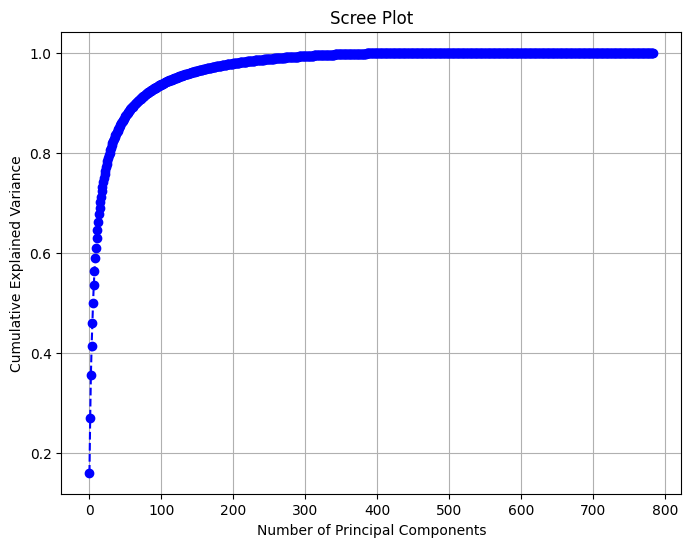

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.decomposition import PCA

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Select the images corresponding to the digit '7'
digit = 7
selected_images = images[labels == digit]

# Flatten the images and normalize
n_samples = selected_images.shape[0]
flattened_images = selected_images.reshape(n_samples, -1) / 255.0

# Perform PCA, keeping all components
pca = PCA()
pca_result = pca.fit_transform(flattened_images)

# Plot the Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

3. Visualize the PCA components and loadings distribution (the first two components)

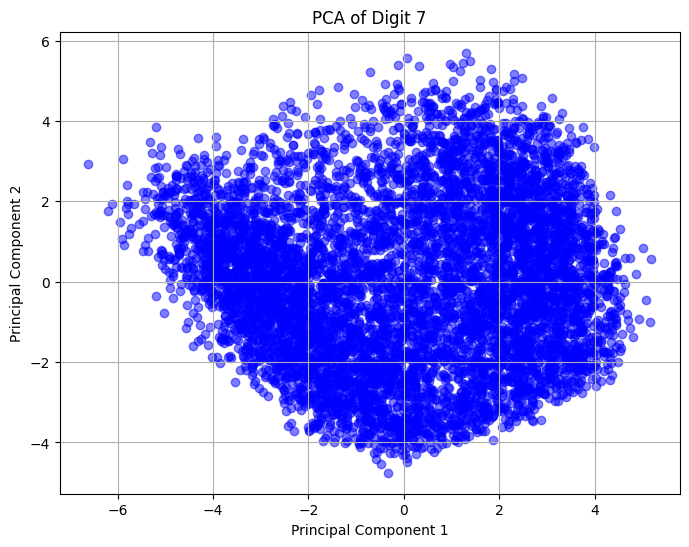

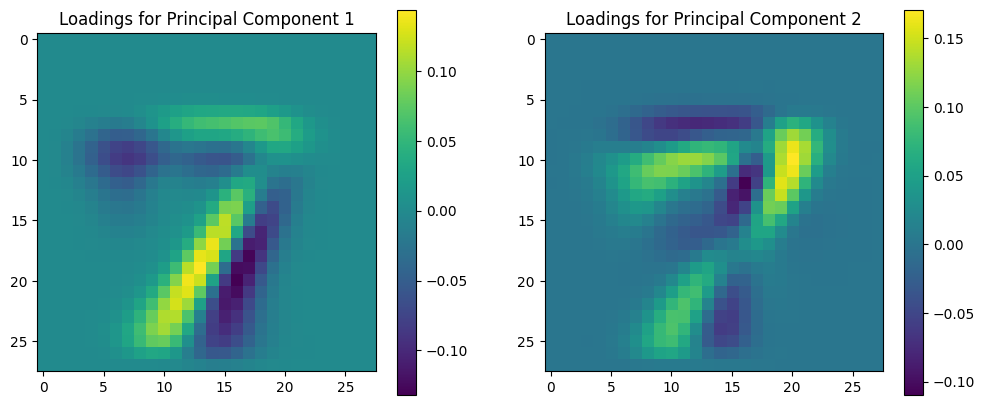

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.decomposition import PCA

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Select the images corresponding to the digit '7'
digit = 7
selected_images = images[labels == digit]

# Flatten the images and normalize
n_samples = selected_images.shape[0]
flattened_images = selected_images.reshape(n_samples, -1) / 255.0

# Perform PCA, keeping only the first two components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, color='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA of Digit {digit}')
plt.grid(True)
plt.show()

# Extract and visualize the loadings
loadings = pca.components_.T  # Transpose to align with the original feature space
loading1 = loadings[:, 0].reshape(28, 28)  # Loadings for PC1
loading2 = loadings[:, 1].reshape(28, 28)  # Loadings for PC2

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(loading1, cmap='viridis')
plt.colorbar()
plt.title('Loadings for Principal Component 1')

plt.subplot(1, 2, 2)
plt.imshow(loading2, cmap='viridis')
plt.colorbar()
plt.title('Loadings for Principal Component 2')

plt.show()

4. Generative model:
- run the PCA analysis with 2 components
- sample the loading space with the rectangular grid
- generate the images from the loading space (i.e. create latent representation)
- do you observe any trends in images across the loading space?

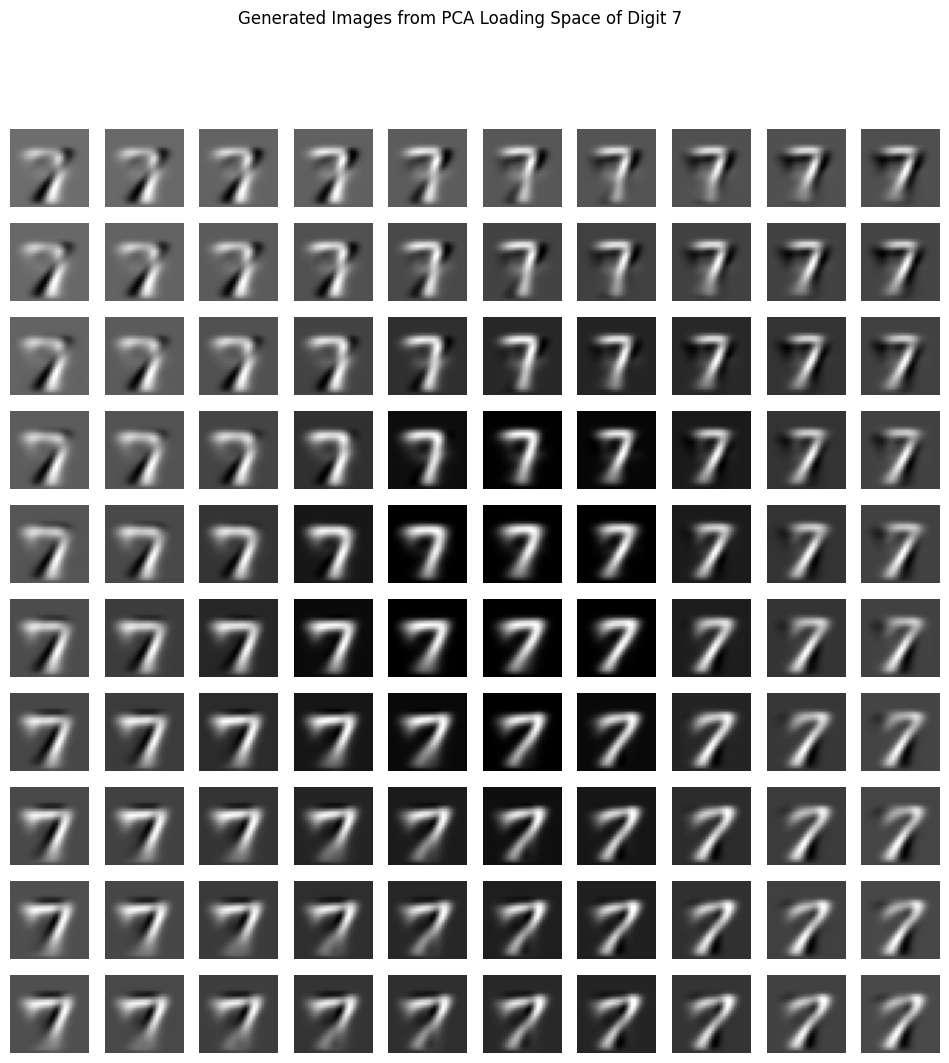

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.decomposition import PCA

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Select the images corresponding to the digit '7'
digit = 7
selected_images = images[labels == digit]

# Flatten the images and normalize
n_samples = selected_images.shape[0]
flattened_images = selected_images.reshape(n_samples, -1) / 255.0

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Define a grid over the PCA space
x_min, x_max = pca_result[:, 0].min() - 1, pca_result[:, 0].max() + 1
y_min, y_max = pca_result[:, 1].min() - 1, pca_result[:, 1].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Inverse transform the grid points back to the original image space
reconstructed_images = pca.inverse_transform(grid_points)

# Reshape the images to 28x28 for visualization
reconstructed_images = reconstructed_images.reshape(-1, 28, 28)

# Visualize the generated images
plt.figure(figsize=(12, 12))
for i, image in enumerate(reconstructed_images):
    plt.subplot(10, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.suptitle(f'Generated Images from PCA Loading Space of Digit {digit}')
plt.show()

# **Observations and Trends:**
*  **Smooth Transition:** As you move across the grid in the PCA loading space, you should observe a smooth transition between images, indicating that the principal components capture variations in the digit's shape or style.

*  **Variations in Image Features:** You might notice specific features of the digit (e.g., the tilt of the "7", the thickness of the stroke) changing gradually as you move in the PCA space. This is because the first two principal components represent the most significant variations in the dataset.

*  **Dimensionality and Reconstruction:** Since we reduced the dimensionality to just two components, the reconstructed images may lose some fine details, but major features and trends should still be visible.

5. In the PCA generative model, each image is represented by 2 PCA loadings. Where does the information to "reconstruct" images come from?

Answer 5:

In a PCA generative model, each image is represented by a set of PCA loadings (or scores), which are essentially coordinates in the reduced-dimensional space defined by the principal components. The process of "reconstructing" images from these loadings involves using both the PCA loadings and the principal component vectors, along with the mean of the original data. Here's where the information for reconstruction comes from:

# **1. PCA Loadings (Scores):**
*  These are the coordinates of each image in the reduced-dimensional PCA space. For a 2-component PCA, each image is represented by two values corresponding to its position along the first and second principal components. These loadings capture the essential variation of the images within the lower-dimensional space.

# **2. Principal Components (Eigenvectors):**
*  The principal components are the directions in the original high-dimensional space (e.g., 784 dimensions for 28x28 images) that capture the most variance in the data. They are the eigenvectors of the covariance matrix of the original data.
*  Each principal component is a vector that indicates how much each original feature (pixel) contributes to that component.
*  In a 2-component PCA, there are two principal components, each being a 784-dimensional vector (for 28x28 images).

# **3. Mean of the Original Data:**
*  PCA centers the data by subtracting the mean of the dataset before projecting it onto the principal components.
*  To reconstruct an image from the PCA loadings, the mean image (which is also a 784-dimensional vector for the 28 × 28 images) must be added back after transforming the loadings back to the original space.

**Reconstruction Process:**

Given the PCA loadings (let's call them z_1 and z_2 for the first and second components):

1. **Weighted Sum of Principal Components**: Each loading is used to scale the corresponding principal component:

      Reconstructed Image = z_1 × PC_1 + z_2 × PC_2 + Mean Image

  Where PC_1 and PC_2 are the principal component vectors.

  The terms z_1 × PC_1 and z_2 × PC_2 represent the contribution of each principal component to the reconstructed image.

2. **Principal Components:** The principal components provide the "directions" in the original feature space that describe the main variations in the data.
Mean Image: The mean image ensures that the reconstructed image has the correct baseline intensity or average appearance.

   Where the Information Comes From:

*      **PCA Loadings:** The loadings z_1 and z_2 determine the specific linear combination of the principal components that reconstructs each image.
*      **Principal Components:** The principal components provide the "directions" in the original feature space that describe the main variations in the data.
*      **Mean Image:** The mean image ensures that the reconstructed image has the correct baseline intensity or average appearance.

6. (Optional). Create a function that analyzes the "writing style" of the reconstructed image, meaning function transforming (image) -> (several scalar descriptors). For example, it can be the tilt and axis ratio of the tensor of moments of inertia for binarized image. Map this function over the latent space of the model.

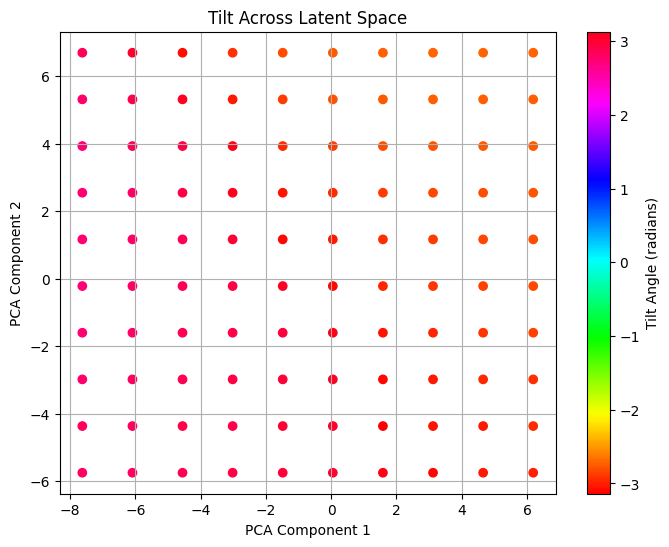

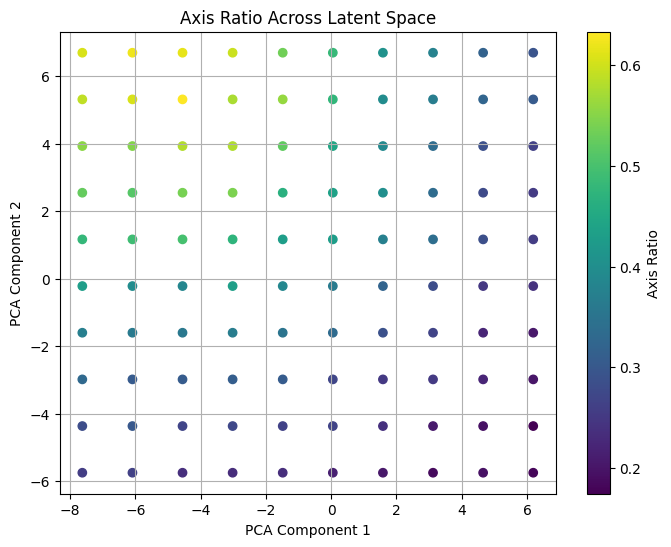

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass
from scipy.linalg import eigh
from keras.datasets import mnist
from sklearn.decomposition import PCA

# Step 1: Function to Binarize the Image
def binarize_image(image, threshold=0.5):
    return (image > threshold).astype(float)

# Step 2: Function to Calculate the Tensor of Moments of Inertia
def calculate_moments_of_inertia(image):
    rows, cols = image.shape
    mass = image.sum()

    # Calculate the center of mass
    y_c, x_c = center_of_mass(image)

    # Initialize the inertia tensor components
    Ixx, Iyy, Ixy = 0, 0, 0

    for y in range(rows):
        for x in range(cols):
            dy = y - y_c
            dx = x - x_c
            Ixx += image[y, x] * dy**2
            Iyy += image[y, x] * dx**2
            Ixy += image[y, x] * dx * dy

    # Normalize by mass
    Ixx /= mass
    Iyy /= mass
    Ixy /= mass

    # Tensor of inertia
    inertia_tensor = np.array([[Ixx, -Ixy], [-Ixy, Iyy]])
    return inertia_tensor

# Step 3: Function to Extract Tilt and Axis Ratio
def extract_style_descriptors(image):
    binary_image = binarize_image(image)
    inertia_tensor = calculate_moments_of_inertia(binary_image)

    # Eigenvalue decomposition
    evals, evecs = eigh(inertia_tensor)

    # Tilt (angle of the largest eigenvector with the x-axis)
    tilt_angle = np.arctan2(evecs[1, 1], evecs[0, 1])

    # Axis ratio (ratio of the smallest to the largest eigenvalue)
    axis_ratio = evals[0] / evals[1] if evals[1] != 0 else 0

    return tilt_angle, axis_ratio

# Step 4: Apply the Function Over the Latent Space
def analyze_latent_space(pca, grid_points, image_mean):
    descriptors = []

    for point in grid_points:
        reconstructed_image = pca.inverse_transform(point).reshape(28, 28) + image_mean.reshape(28, 28)
        tilt, axis_ratio = extract_style_descriptors(reconstructed_image)
        descriptors.append((tilt, axis_ratio))

    return np.array(descriptors)

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)
selected_images = images[labels == 7]  # Select digit '7'
flattened_images = selected_images.reshape(selected_images.shape[0], -1) / 255.0

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)
image_mean = np.mean(flattened_images, axis=0)

# Define a grid over the PCA space
x_min, x_max = pca_result[:, 0].min() - 1, pca_result[:, 0].max() + 1
y_min, y_max = pca_result[:, 1].min() - 1, pca_result[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Analyze the latent space
style_descriptors = analyze_latent_space(pca, grid_points, image_mean)

# Visualize the tilt and axis ratio across the latent space
tilts, axis_ratios = style_descriptors[:, 0], style_descriptors[:, 1]

# Plot tilt
plt.figure(figsize=(8, 6))
plt.scatter(xx.ravel(), yy.ravel(), c=tilts, cmap='hsv', marker='o')
plt.colorbar(label='Tilt Angle (radians)')
plt.title('Tilt Across Latent Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# Plot axis ratio
plt.figure(figsize=(8, 6))
plt.scatter(xx.ravel(), yy.ravel(), c=axis_ratios, cmap='viridis', marker='o')
plt.colorbar(label='Axis Ratio')
plt.title('Axis Ratio Across Latent Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# Problem 2 - LDA

7. Here, we will run the LDA on the MNIST data set.
- Identify (any) 3 digits that you would like to explore and assign as classes 1, 2, and 3
- Designate all other digits as class 0
- Run the LDA analysis
- If the analysis takes too long (>5 min), decimate the data set as [::10]

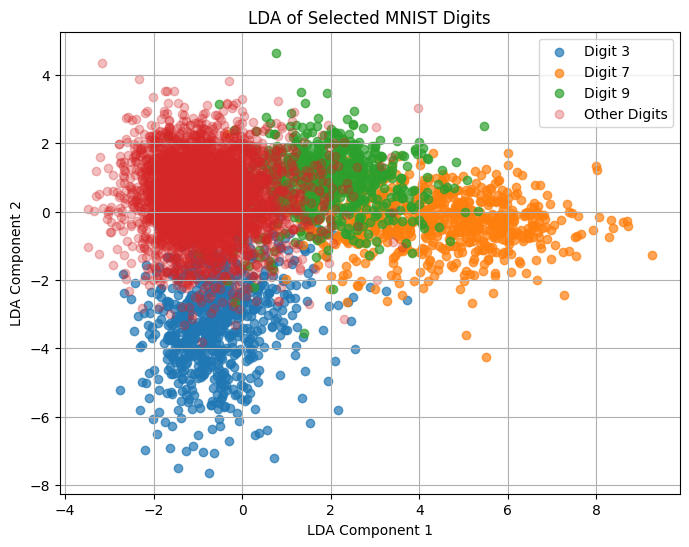

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Decimate the dataset to speed up processing if necessary
images = images[::10]
labels = labels[::10]

# Choose three digits to classify
digit_1 = 3
digit_2 = 7
digit_3 = 9

# Assign new labels
new_labels = np.zeros_like(labels)
new_labels[labels == digit_1] = 1
new_labels[labels == digit_2] = 2
new_labels[labels == digit_3] = 3

# Flatten and normalize the images
flattened_images = images.reshape(images.shape[0], -1)
scaler = StandardScaler()
flattened_images = scaler.fit_transform(flattened_images)

# Perform LDA
lda = LDA(n_components=2)
lda_result = lda.fit_transform(flattened_images, new_labels)

# Visualize the LDA result
plt.figure(figsize=(8, 6))
plt.scatter(lda_result[new_labels == 1, 0], lda_result[new_labels == 1, 1], label=f'Digit {digit_1}', alpha=0.7)
plt.scatter(lda_result[new_labels == 2, 0], lda_result[new_labels == 2, 1], label=f'Digit {digit_2}', alpha=0.7)
plt.scatter(lda_result[new_labels == 3, 0], lda_result[new_labels == 3, 1], label=f'Digit {digit_3}', alpha=0.7)
plt.scatter(lda_result[new_labels == 0, 0], lda_result[new_labels == 0, 1], label='Other Digits', alpha=0.3)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of Selected MNIST Digits')
plt.legend()
plt.grid(True)
plt.show()

8. Visualize the LDA results in the 2D LDA feature space. Use the original digits as labels

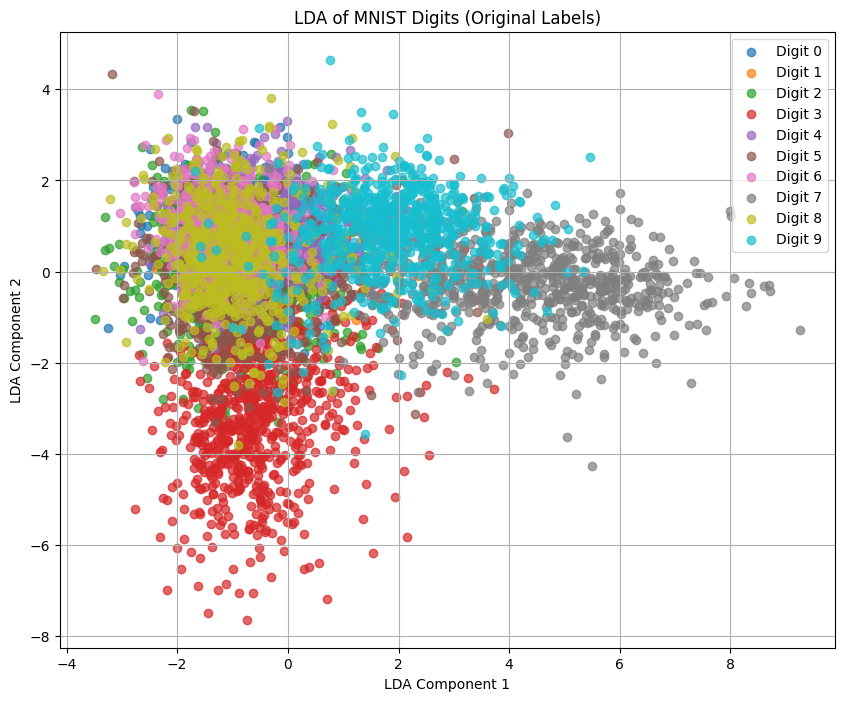

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Decimate the dataset to speed up processing if necessary
images = images[::10]
labels = labels[::10]

# Choose three digits to classify
digit_1 = 3
digit_2 = 7
digit_3 = 9

# Assign new labels for LDA
new_labels = np.zeros_like(labels)
new_labels[labels == digit_1] = 1
new_labels[labels == digit_2] = 2
new_labels[labels == digit_3] = 3

# Flatten and normalize the images
flattened_images = images.reshape(images.shape[0], -1)
scaler = StandardScaler()
flattened_images = scaler.fit_transform(flattened_images)

# Perform LDA
lda = LDA(n_components=2)
lda_result = lda.fit_transform(flattened_images, new_labels)

# Visualize the LDA result using original digit labels
plt.figure(figsize=(10, 8))
for digit in np.unique(labels):
    plt.scatter(lda_result[labels == digit, 0], lda_result[labels == digit, 1], label=f'Digit {digit}', alpha=0.7)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of MNIST Digits (Original Labels)')
plt.legend()
plt.grid(True)
plt.show()

9. Run the analysis when the selected classes are "0", "1", and "8". Where will be the "6" and "9" in the LDA feature space

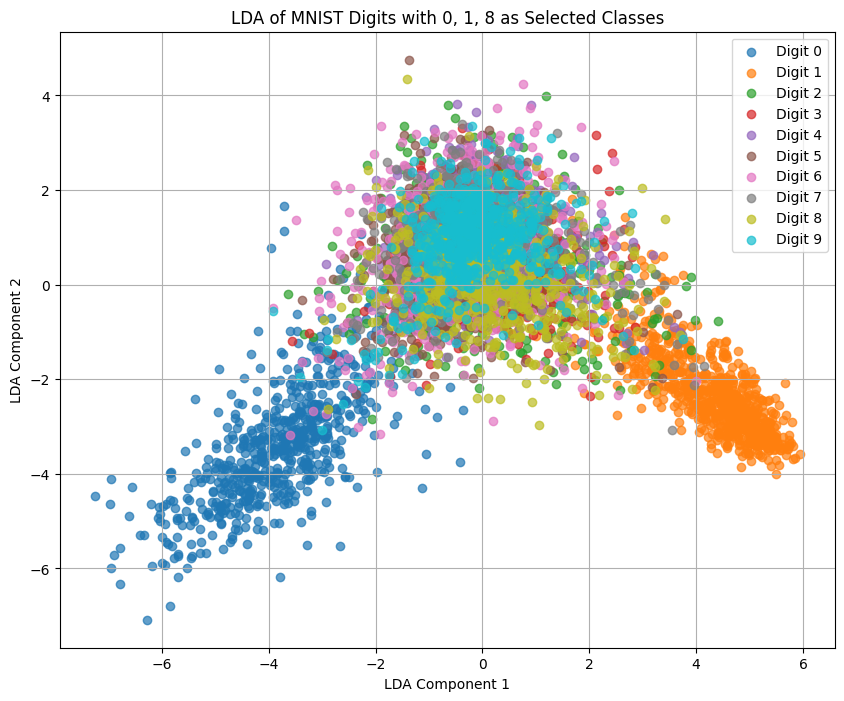

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Decimate the dataset to speed up processing if necessary
images = images[::10]
labels = labels[::10]

# Choose digits 0, 1, and 8 as the main classes
digit_1 = 0
digit_2 = 1
digit_3 = 8

# Assign new labels for LDA
new_labels = np.zeros_like(labels)
new_labels[labels == digit_1] = 1
new_labels[labels == digit_2] = 2
new_labels[labels == digit_3] = 3

# Flatten and normalize the images
flattened_images = images.reshape(images.shape[0], -1)
scaler = StandardScaler()
flattened_images = scaler.fit_transform(flattened_images)

# Perform LDA
lda = LDA(n_components=2)
lda_result = lda.fit_transform(flattened_images, new_labels)

# Visualize the LDA result using original digit labels
plt.figure(figsize=(10, 8))
for digit in np.unique(labels):
    plt.scatter(lda_result[labels == digit, 0], lda_result[labels == digit, 1], label=f'Digit {digit}', alpha=0.7)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of MNIST Digits with 0, 1, 8 as Selected Classes')
plt.legend()
plt.grid(True)
plt.show()

Answer 9:

**Observations:**

1. Position of "6" and "9" in the LDA Feature Space:

*   Since "6" and "9" are visually similar to "0" and "8", they might cluster closer to the regions representing these digits.
*  "6" might be closer to "0" due to its rounded shape.
*  "9" might be closer to "8" because of their similar shapes (especially the loop at the top).

2. Interpretation:

*  If the LDA model is effective, you should see clear separations between the digits "0", "1", and "8" in the 2D space.
*  The digits "6" and "9" might not be as clearly separated since they were not explicitly classified, but their positions in the LDA space can provide insights into their similarities with the chosen classes.

# Problem 3 - QDA on EELS

Download EELS data. This is 12 EELS spectral data sets of indium-tin oxide cubes aquired by Kevin Roccapriore, measured at different resolutions and geometries. Pick the one you like!

In [11]:
%%capture
!wget https://www.dropbox.com/s/nicyvttpihzh1cd/Plasmonic_sets_7222021_fixed.npy
loadedfile = np.load("Plasmonic_sets_7222021_fixed.npy", allow_pickle=True).tolist()

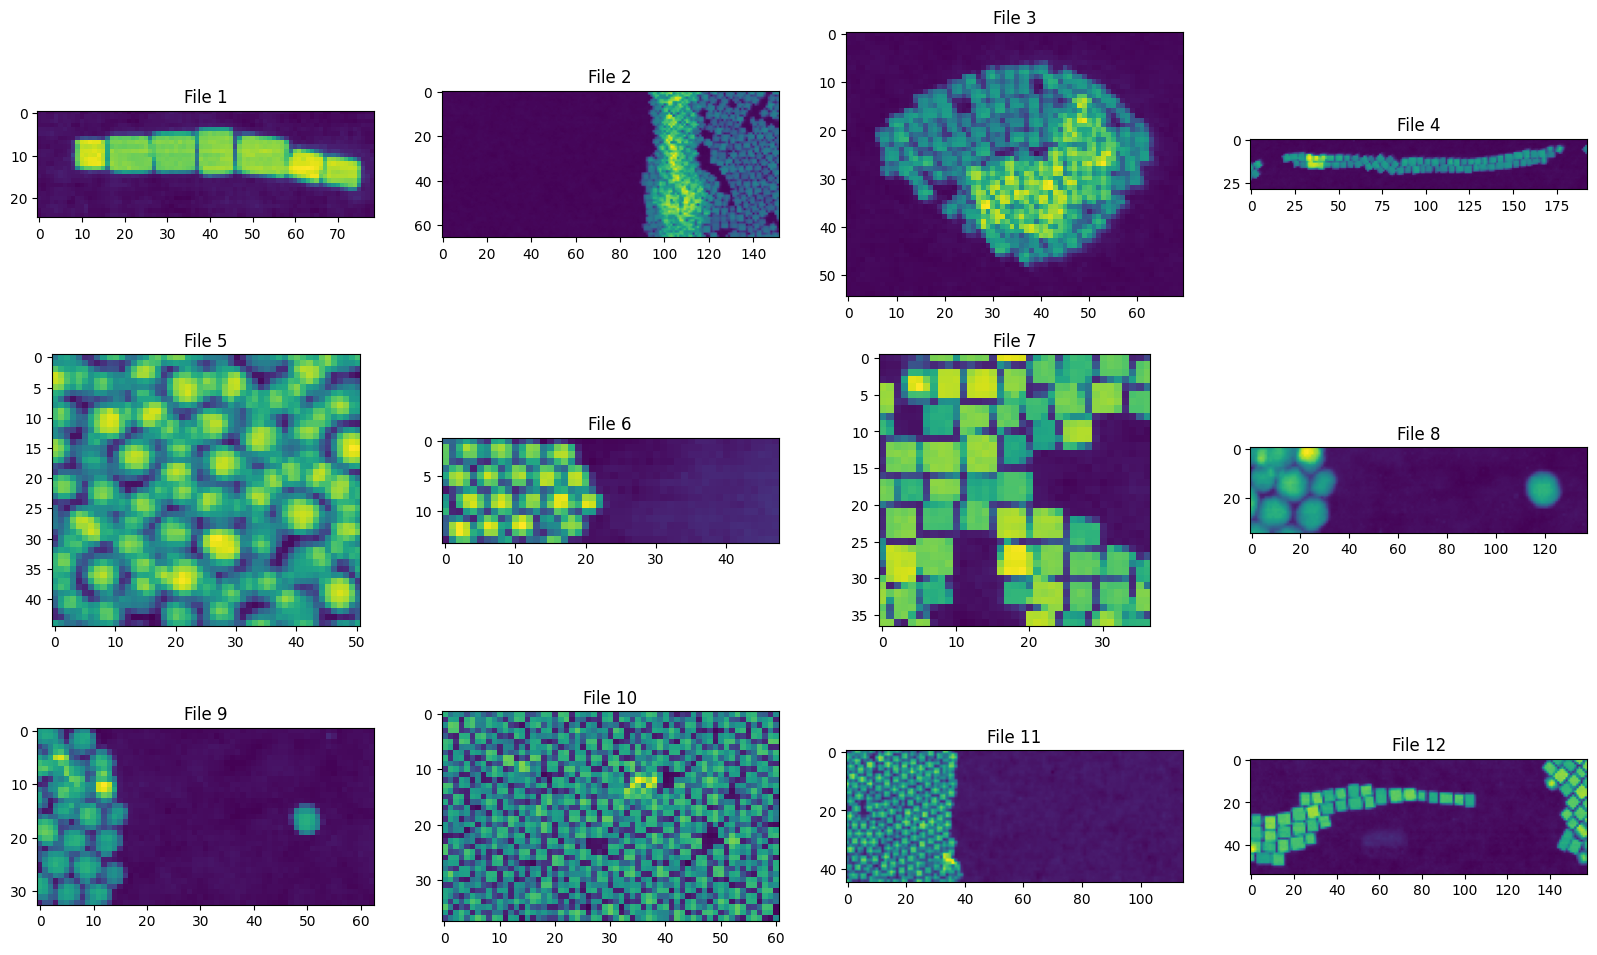

In [12]:
num_im = len(loadedfile)
rows = int(np.ceil(float(num_im)/4))
cols = int(np.ceil(float(num_im)/rows))

gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize = (5*cols, 3*(1+rows)))

for kk in range(num_im):
    ax = fig.add_subplot(gs[kk])
    fileset  = loadedfile['{}'.format(kk+1)]
    f1,f2,f3,f4 = fileset
    img, data, e_ax, img_scale = fileset[f1], fileset[f2], fileset[f3], fileset[f4]
    ax.imshow(img)
    ax.set_title("File {}".format(kk+1))

In [13]:
# Choose the file for analysis

k = 3
img = loadedfile['{}'.format(k)]['image']
specim = loadedfile['{}'.format(k)]['spectrum image']
e_ax = loadedfile['{}'.format(k)]['energy axis']
imscale = loadedfile['{}'.format(k)]['scale']

In [14]:
# Read grid spectoscopy data

hdata = specim
hdata = hdata.astype(np.float64)

Visual inspection of the :

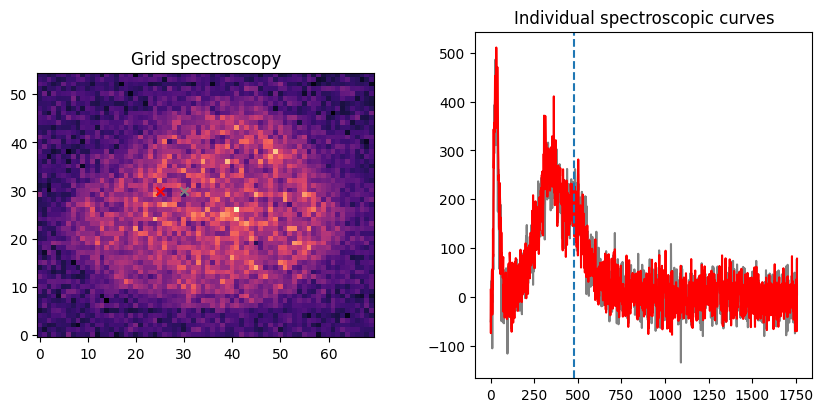

In [15]:
# Select a slice and points for extracting idividual spectoscopic curves
# For convenience, we look at the data in pixels (however, we store the real scale as e_ax)

s = 480 # slice
pos1 = [30, 30]
pos2 = [25, 30]

# Plot
_, ax = plt.subplots(1, 2, figsize=(10, 4.5))
ax[0].imshow(hdata[..., s], cmap='magma', origin="lower")
ax[0].scatter(pos1[0], pos1[1], c='gray', marker='x')
ax[1].plot(hdata[pos1[1], pos1[0], :], c='gray')
ax[0].scatter(pos2[0], pos2[1], c='red', marker='x')
ax[1].plot(hdata[pos2[1], pos2[0], :], c='red')
ax[1].axvline(x=s, linestyle = '--')
ax[0].set_title('Grid spectroscopy')
ax[1].set_title('Individual spectroscopic curves')
plt.subplots_adjust(wspace=.3)

Important considerations for subsequent analysis.
 - For "real" analysis, make sure that before any subsequent analysis the data is properly curated. For EELS this is zero loss peak subtraction and log-log deconvolution. This will affect analysis very strongly (e.g. zero-loss peak will dominate everything if not accounted for).
 - You can also consider downsampling the data (just average pool).
 - Finally, always keep track on whether you normalize data and how (all spectra 0 to 1, or all normalized to total maximum)
 - And keep track on whether average is subtracted.
 - Normalization and average subtraction will affect the analysis results. In our experience, there is no right way or wrong way for doing it - different preprocessing highlights dissimilar aspects of the physics of the system. However, it is important to keep track of these.  

In [16]:
X_vec = hdata.copy()
d1, d2, d3 = X_vec.shape
X_vec = X_vec.reshape(d1*d2, d3)
X_vec = (X_vec - np.min(X_vec)) / np.ptp(X_vec)

In [17]:
d1, d2, d3

(55, 70, 1758)

Here we run the PCA analysis on EELS to visualzie the results

In [18]:
# Select number of components
nc = 12

# Select decomposition type ('PCA' or 'NMF')
decomposition_type = 'PCA'

# Run decomposition
if decomposition_type == 'NMF':
    clf = decomposition.NMF(n_components=nc, random_state=42)
elif decomposition_type == 'PCA':
    clf = decomposition.PCA(n_components=nc, random_state=42)
else:
    raise NotImplementedError('Available methods: "PCA", "NMF"')
X_vec_t = clf.fit_transform(X_vec)
components = clf.components_
components = components.reshape(nc, d3)
print(components.shape, X_vec_t.shape)

(12, 1758) (3850, 12)


NUMBER OF COMPONENTS: 12
Components...


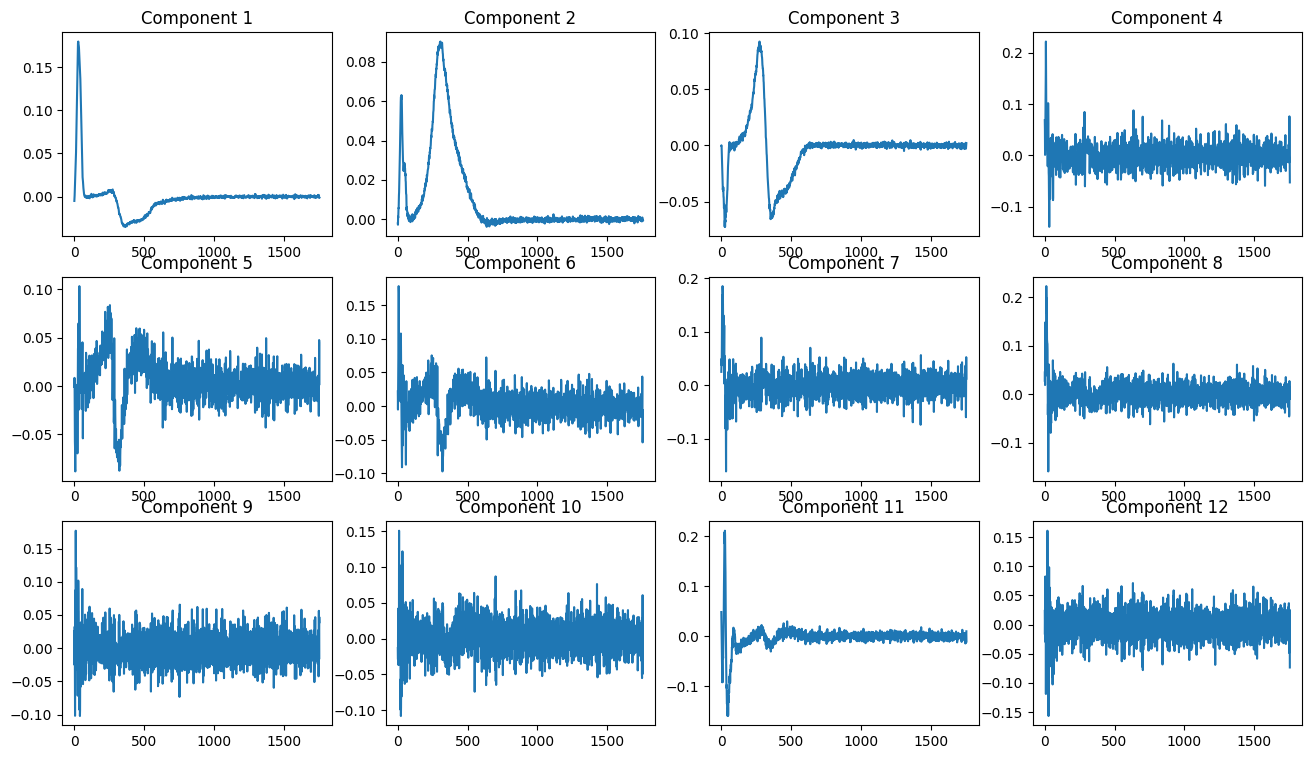

Abundance maps...


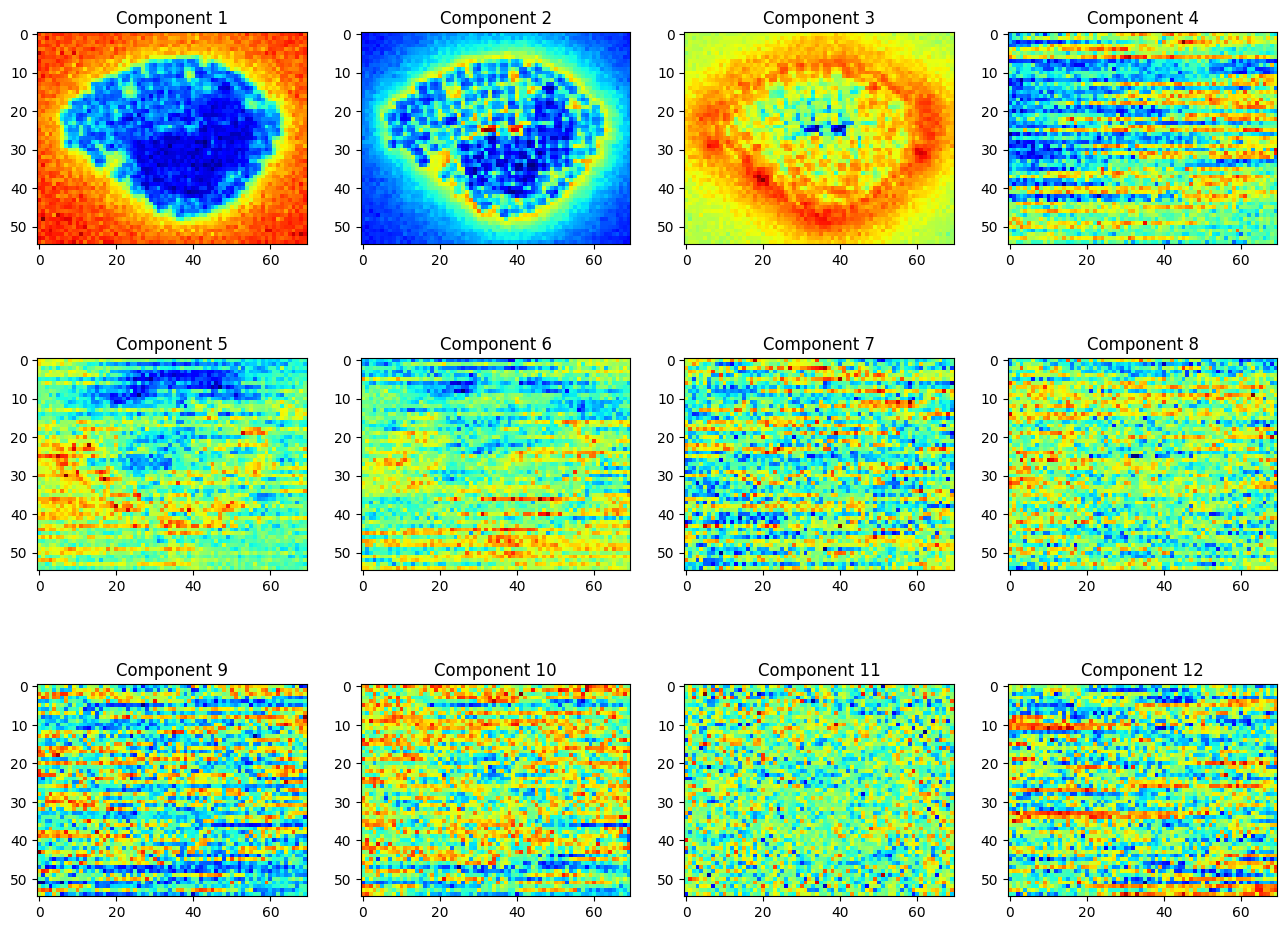

In [19]:
rows = int(np.ceil(float(nc)/5))
cols = int(np.ceil(float(nc)/rows))

print('NUMBER OF COMPONENTS: ' + str(nc))
print('Components...')
gs1 = gridspec.GridSpec(rows, cols)
fig1 = plt.figure(figsize = (4*cols, 3.5*(1+rows)//1.5))
for i in range(nc):
    ax1 = fig1.add_subplot(gs1[i])
    j = 0
    ax1.plot(components[i])
    ax1.set_title('Component ' + str(i + 1))
plt.show()

print('Abundance maps...')
gs2 = gridspec.GridSpec(rows, cols)
fig2 = plt.figure(figsize = (4*cols, 4*(1+rows//1.5)))
for i in range(nc):
    ax2 = fig2.add_subplot(gs2[i])
    ax2.imshow(X_vec_t[:, i].reshape(d1, d2), cmap = 'jet')
    ax2.set_title('Component ' + str(i + 1))
plt.show()

10. Let's explore the QDA analysis on the EELS data set. Here, as a first step we need to create meaningful class labels. There are multiple ways we can make them based on the prior knowledge, physical intuition, or curiosity. Here, pick one of the three ways:
- Using the PCA images as a guide, identify ~10 points/class as class 1, 2, ... . Note that one class should be in the empty space (e.g. point (0,0) and few similar ones). Others can be identified as corners of the nanoparticle clusters, etc. In other words, we identify possible classes for spectra based on structural similarity of images
- We can also use the PCA maps to help "identify" classes. For example, using the peak finding function to identify dark/bright points on one of the PCA maps
- The output will be the 2D array of the same size as the the image, with most of the points having class label 0 and others being class labels 1, 2, ...


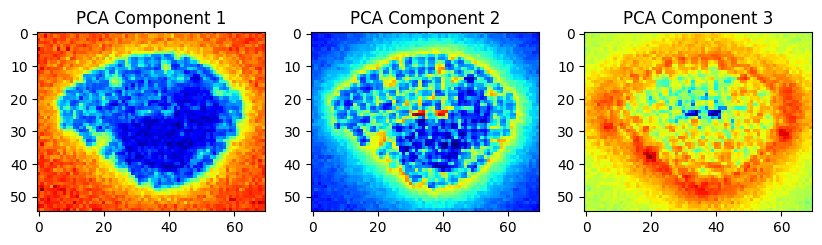

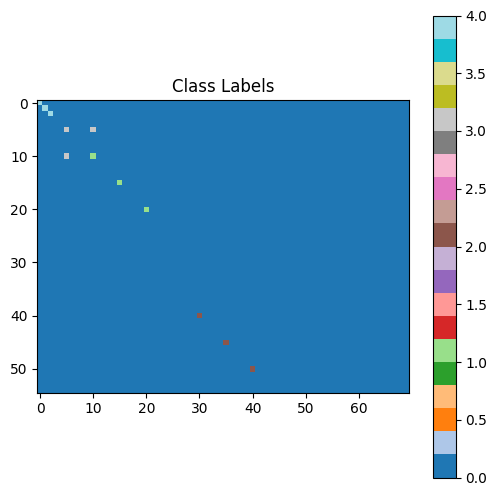

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


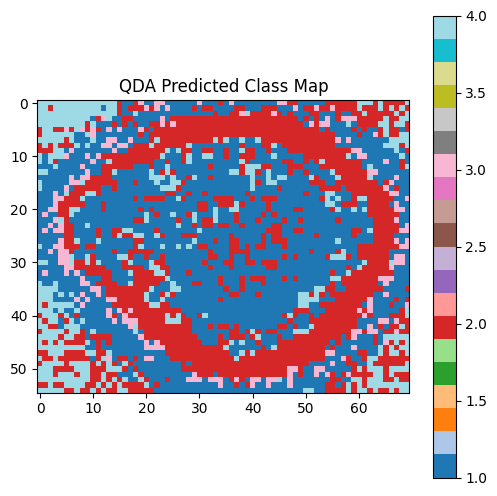

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Assume components, X_vec_t, d1, d2 are already defined from previous PCA steps

# Step 1: Visualize PCA components to guide class selection
plt.figure(figsize=(10, 5))
for i in range(1, 4):  # Let's visualize the first 3 PCA components
    plt.subplot(1, 3, i)
    plt.imshow(X_vec_t[:, i-1].reshape(d1, d2), cmap='jet')
    plt.title(f'PCA Component {i}')
plt.show()

# Step 2: Manually select points based on the visualized PCA maps
# Here, we define class labels manually based on the PCA maps

# Example selected points (you would refine these based on your actual data):
class1_points = [(10, 10), (15, 15), (20, 20)]  # Example points for class 1
class2_points = [(30, 40), (35, 45), (40, 50)]  # Example points for class 2
class3_points = [(5, 5), (5, 10), (10, 5)]      # Example points for class 3
class_empty_space = [(0, 0), (2, 2), (1, 1)]    # Example points for empty space class

# Step 3: Create a 2D array for class labels
class_labels = np.zeros((d1, d2), dtype=int)

# Assign class labels based on the selected points
for x, y in class1_points:
    class_labels[y, x] = 1

for x, y in class2_points:
    class_labels[y, x] = 2

for x, y in class3_points:
    class_labels[y, x] = 3

for x, y in class_empty_space:
    class_labels[y, x] = 4  # Class for empty space

# Visualize the class labels
plt.figure(figsize=(6, 6))
plt.imshow(class_labels, cmap='tab20')
plt.title('Class Labels')
plt.colorbar()
plt.show()

# Step 4: Apply QDA to the dataset
# Flatten the class labels for compatibility with QDA
class_labels_flat = class_labels.flatten()

# Only use points with class labels for training
mask = class_labels_flat > 0
X_qda = X_vec_t[mask]  # Spectral data corresponding to labeled points
y_qda = class_labels_flat[mask]  # Corresponding class labels

# Fit QDA
qda = QDA()
qda.fit(X_qda, y_qda)

# Predict classes for the entire dataset
class_predictions = qda.predict(X_vec_t)

# Reshape predictions to 2D image shape
class_predictions_2d = class_predictions.reshape(d1, d2)

# Visualize the predicted class map
plt.figure(figsize=(6, 6))
plt.imshow(class_predictions_2d, cmap='tab20')
plt.title('QDA Predicted Class Map')
plt.colorbar()
plt.show()

11. Run the QDA analysis on the selected classes (meaning ignore the class 0 points)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


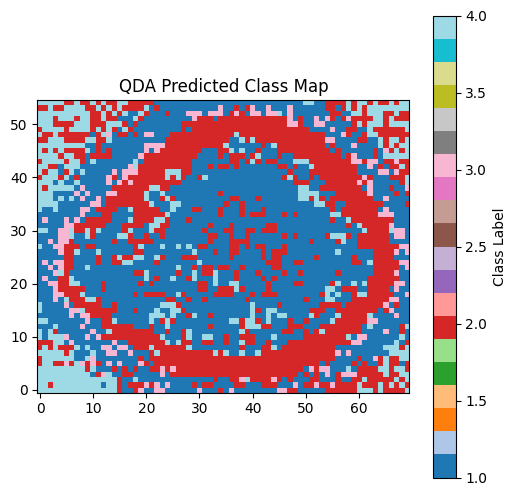

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Assume class_labels, X_vec_t, d1, d2 are already defined

# Step 1: Flatten the class labels and feature matrix
class_labels_flat = class_labels.flatten()
X_vec_flat = X_vec_t  # X_vec_t is already in 2D shape (d1*d2, nc)

# Step 2: Mask to select only non-zero class points (i.e., ignore class 0)
mask = class_labels_flat > 0
X_qda = X_vec_flat[mask]  # Select only the rows corresponding to non-zero class labels
y_qda = class_labels_flat[mask]  # Corresponding class labels

# Step 3: Fit the QDA model
qda = QDA()
qda.fit(X_qda, y_qda)

# Step 4: Predict class labels for the entire dataset using the trained model
class_predictions = qda.predict(X_vec_flat)

# Step 5: Reshape the predictions to the original image shape (d1, d2)
class_predictions_2d = class_predictions.reshape(d1, d2)

# Step 6: Visualize the predicted class map
plt.figure(figsize=(6, 6))
plt.imshow(class_predictions_2d, cmap='tab20', origin='lower')
plt.title('QDA Predicted Class Map')
plt.colorbar(label='Class Label')
plt.show()

12. Using the trained QDA model, classify the remaining spectra. Visualize the class labels image

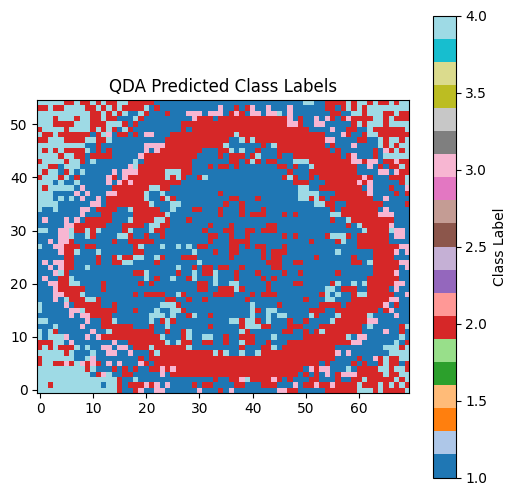

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Assuming class_labels, X_vec_t, d1, d2 are already defined
# and the QDA model is already trained from previous steps

# Step 1: Use the trained QDA model to classify all spectra
class_predictions = qda.predict(X_vec_t)

# Step 2: Reshape the predicted class labels to the original 2D image shape
class_predictions_2d = class_predictions.reshape(d1, d2)

# Step 3: Visualize the predicted class labels as an image
plt.figure(figsize=(6, 6))
plt.imshow(class_predictions_2d, cmap='tab20', origin='lower')
plt.title('QDA Predicted Class Labels')
plt.colorbar(label='Class Label')
plt.show()

# Problem 4 - MLR on EELS

Now, let's run the multiple regression analysis on the EELS data set. Here, we represent each EELS spectrum A(x,y,E) as a linear combination of endmember spectra A_i(E), i.e. try to find linear coefficients a1, a2, ... , an in A(x,y,E) = a1(x,y) A_1(E) + a2(x,y) A_2(E) + ... + an(x,y) A_n(E). Unlike the PCA analysis, the endmembers A_i(E) are **known**.

13. Create the endmembers by averaging within the classes that you created above

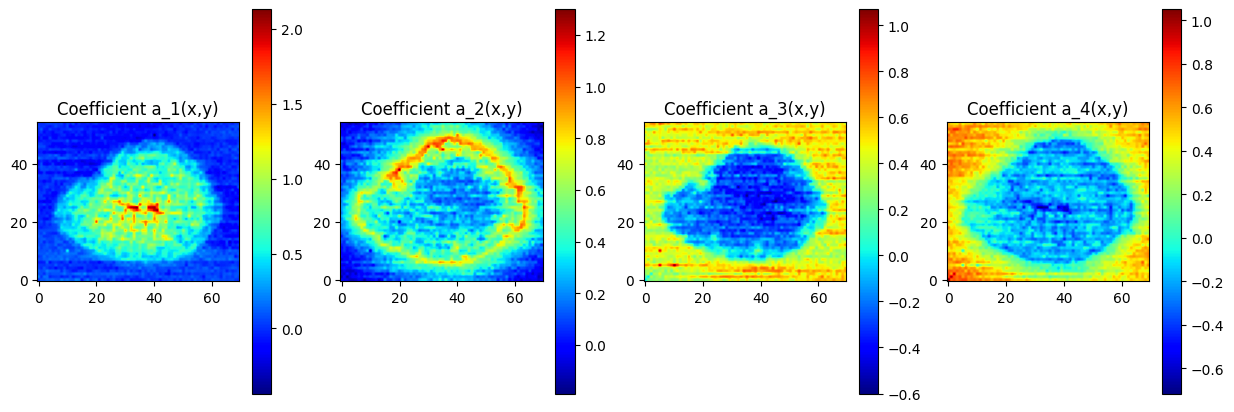

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Extract and organize spectra for each class
class_spectra = {}

for i in range(d1):
    for j in range(d2):
        class_label = class_labels[i, j]
        if class_label > 0:  # Exclude class 0 (unlabeled)
            if class_label not in class_spectra:
                class_spectra[class_label] = []
            class_spectra[class_label].append(hdata[i, j, :])

# Convert lists to arrays
for key in class_spectra.keys():
    class_spectra[key] = np.array(class_spectra[key])

# Step 2: Calculate the endmember spectra by averaging within each class
endmembers = {}

for key, spectra in class_spectra.items():
    endmembers[key] = np.mean(spectra, axis=0)

# Convert the endmembers dictionary to a 2D array for regression
# Each row is an endmember spectrum
endmembers_array = np.array([endmembers[key] for key in sorted(endmembers.keys())])

# Step 3: Prepare the data for regression
hdata_reshaped = hdata.reshape(d1 * d2, d3)  # Reshape the EELS data

# Perform multiple regression
coefficients = np.zeros((d1 * d2, endmembers_array.shape[0]))

for i in range(hdata_reshaped.shape[0]):
    reg = LinearRegression(fit_intercept=False)
    reg.fit(endmembers_array.T, hdata_reshaped[i])
    coefficients[i] = reg.coef_

# Step 4: Reshape the coefficients to match the spatial dimensions
coefficients_reshaped = coefficients.reshape(d1, d2, -1)

# Step 5: Visualize the coefficient maps
n_endmembers = endmembers_array.shape[0]
plt.figure(figsize=(15, 5))
for i in range(n_endmembers):
    plt.subplot(1, n_endmembers, i + 1)
    plt.imshow(coefficients_reshaped[:, :, i], cmap='jet', origin='lower')
    plt.title(f'Coefficient a_{i + 1}(x,y)')
    plt.colorbar()
plt.show()

14. Create the function that takes unknown spectrum A(E) and known endmember spectra A_i(E), and fits A(E) with linear function A(x,y,E) = a1(x,y) A_1(E) + a2(x,y) A_2(E) + ... + an(x,y) A_n(E) to yield the constants a1, ..., an and fit error. Show the results of the fit for several points.

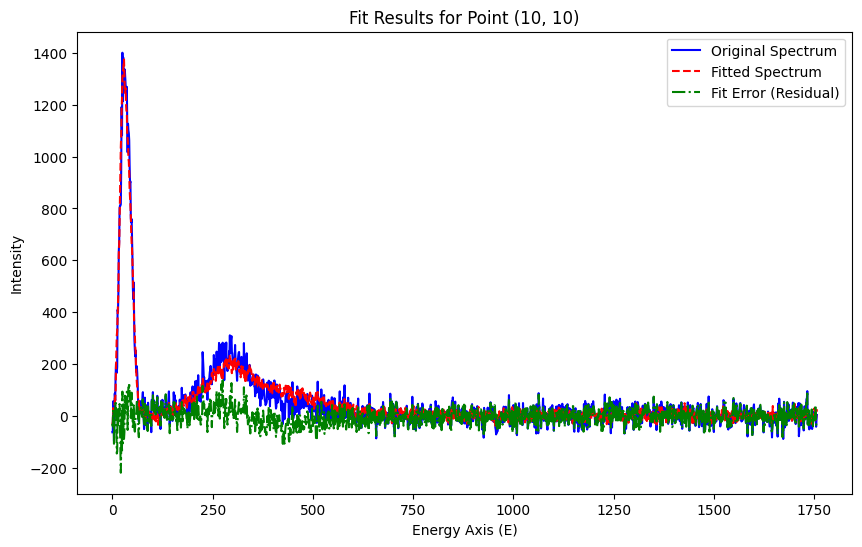

Point (10, 10):
Coefficients: [ 0.50463487 -0.05110122  0.35878607  0.35256303]
Fit Error (Sum of Squared Errors): 2020289.6147270387



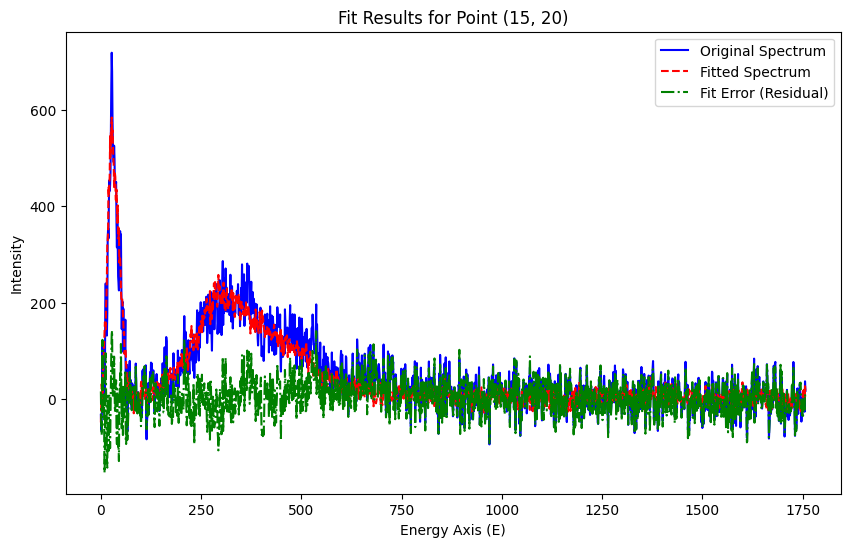

Point (15, 20):
Coefficients: [ 0.57489559  0.28501888 -0.1297881  -0.06757187]
Fit Error (Sum of Squared Errors): 2376724.068020252



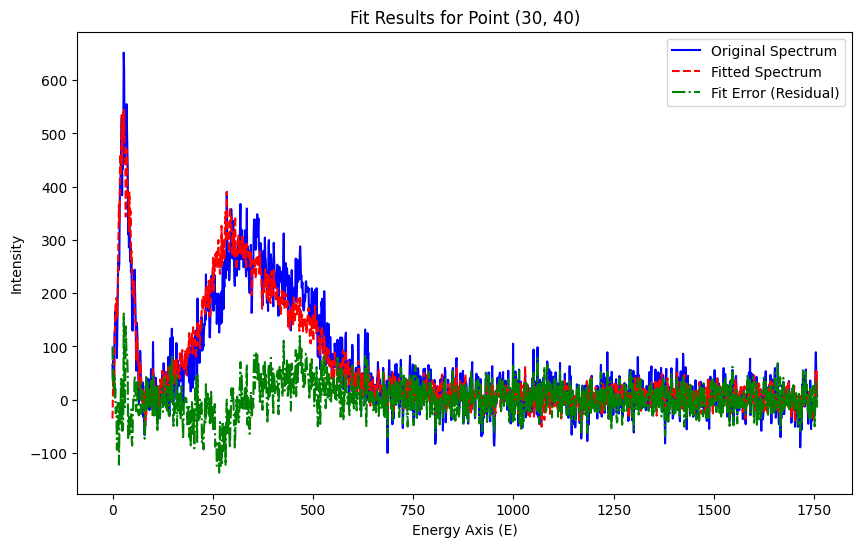

Point (30, 40):
Coefficients: [ 0.36090648  0.80087597 -0.30868144 -0.0961969 ]
Fit Error (Sum of Squared Errors): 1899772.7988791624



In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def fit_spectrum(A, endmembers):
    """
    Fit the unknown spectrum A(E) using known endmember spectra A_i(E).

    Parameters:
    - A: 1D numpy array representing the unknown spectrum A(E)
    - endmembers: 2D numpy array where each row is an endmember spectrum A_i(E)

    Returns:
    - coefficients: 1D numpy array of the fitted coefficients [a1, a2, ..., an]
    - fit_error: 1D numpy array of the fit error (A(E) - fitted_A(E))
    - fitted_spectrum: 1D numpy array of the fitted spectrum
    """
    # Reshape A to match the scikit-learn API
    A = A.reshape(-1, 1)

    # Fit the linear model without intercept
    reg = LinearRegression(fit_intercept=False)
    reg.fit(endmembers.T, A.ravel())
    coefficients = reg.coef_

    # Calculate the fitted spectrum
    fitted_spectrum = np.dot(coefficients, endmembers)

    # Calculate the fit error
    fit_error = A.ravel() - fitted_spectrum

    return coefficients, fit_error, fitted_spectrum

# Example usage
def example_usage(hdata, endmembers, points):
    """
    Example function to demonstrate fitting for several points in the dataset.

    Parameters:
    - hdata: 3D numpy array of the EELS data with shape (d1, d2, d3)
    - endmembers: 2D numpy array of the endmember spectra
    - points: List of tuples [(x1, y1), (x2, y2), ...] specifying points to fit
    """
    for point in points:
        x, y = point
        spectrum = hdata[y, x, :]  # Extract the spectrum at the given (x, y)

        # Fit the spectrum
        coefficients, fit_error, fitted_spectrum = fit_spectrum(spectrum, endmembers)

        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(spectrum, label='Original Spectrum', color='blue')
        plt.plot(fitted_spectrum, label='Fitted Spectrum', linestyle='--', color='red')
        plt.plot(fit_error, label='Fit Error (Residual)', linestyle='-.', color='green')
        plt.title(f'Fit Results for Point ({x}, {y})')
        plt.xlabel('Energy Axis (E)')
        plt.ylabel('Intensity')
        plt.legend()
        plt.show()

        print(f"Point ({x}, {y}):")
        print(f"Coefficients: {coefficients}")
        print(f"Fit Error (Sum of Squared Errors): {np.sum(fit_error**2)}\n")

# Define your data (hdata and endmembers) and select some points for testing
# hdata is the EELS dataset (3D array), endmembers is the 2D array of endmember spectra
# Define points as a list of tuples (x, y) to analyze
points_to_analyze = [(10, 10), (15, 20), (30, 40)]  # Example points

# Example usage: fit spectra at the specified points and show the results
example_usage(hdata, endmembers_array, points_to_analyze)

15. Apply this function to the chosen EELS data set and visualize the results, i.e. the maps of coefficients a_i(x,y) and error map.

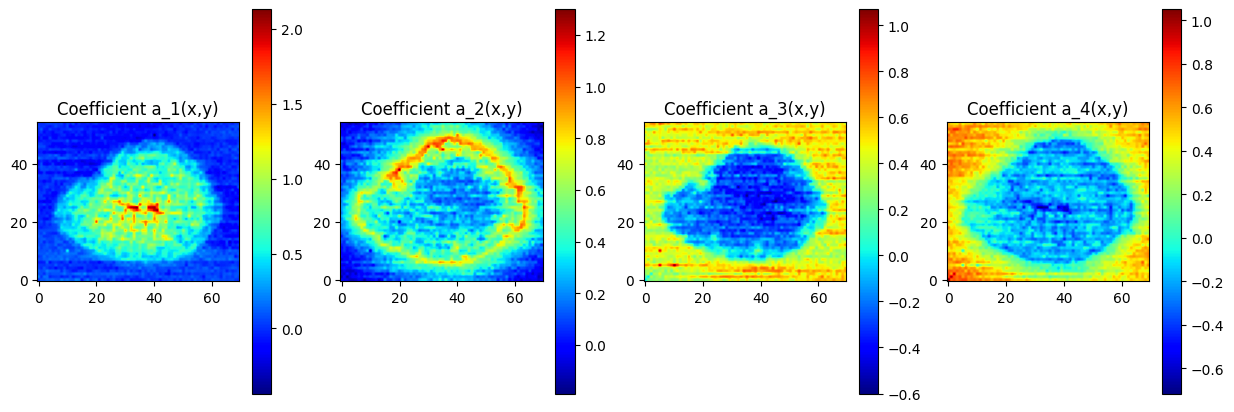

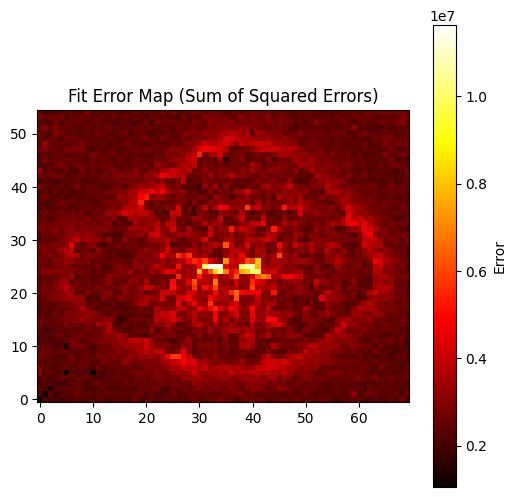

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def fit_spectrum(A, endmembers):
    """
    Fit the unknown spectrum A(E) using known endmember spectra A_i(E).

    Parameters:
    - A: 1D numpy array representing the unknown spectrum A(E)
    - endmembers: 2D numpy array where each row is an endmember spectrum A_i(E)

    Returns:
    - coefficients: 1D numpy array of the fitted coefficients [a1, a2, ..., an]
    - fit_error: 1D numpy array of the fit error (A(E) - fitted_A(E))
    - fitted_spectrum: 1D numpy array of the fitted spectrum
    """
    A = A.reshape(-1, 1)  # Ensure A is a 2D column vector for fitting
    reg = LinearRegression(fit_intercept=False)
    reg.fit(endmembers.T, A.ravel())  # Fit endmembers to the spectrum
    coefficients = reg.coef_  # Get the coefficients
    fitted_spectrum = np.dot(coefficients, endmembers)  # Compute the fitted spectrum
    fit_error = A.ravel() - fitted_spectrum  # Compute the residual error
    return coefficients, fit_error, fitted_spectrum

# Step 1: Initialize arrays to store coefficients and fit errors
coefficients_map = np.zeros((d1, d2, endmembers_array.shape[0]))
error_map = np.zeros((d1, d2))

# Step 2: Loop through each pixel in the spatial domain
for y in range(d1):
    for x in range(d2):
        spectrum = hdata[y, x, :]  # Extract the spectrum at pixel (x, y)
        coefficients, fit_error, fitted_spectrum = fit_spectrum(spectrum, endmembers_array)
        coefficients_map[y, x, :] = coefficients  # Store the coefficients
        error_map[y, x] = np.sum(fit_error**2)  # Store the sum of squared errors

# Step 3: Visualize the coefficient maps
n_endmembers = endmembers_array.shape[0]
plt.figure(figsize=(15, 5))
for i in range(n_endmembers):
    plt.subplot(1, n_endmembers, i + 1)
    plt.imshow(coefficients_map[:, :, i], cmap='jet', origin='lower')
    plt.title(f'Coefficient a_{i + 1}(x,y)')
    plt.colorbar()
plt.show()

# Step 4: Visualize the error map
plt.figure(figsize=(6, 6))
plt.imshow(error_map, cmap='hot', origin='lower')
plt.title('Fit Error Map (Sum of Squared Errors)')
plt.colorbar(label='Error')
plt.show()